# 1数据概况分析 

In [323]:
#导入工具包和数据
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ping = pd.read_csv(r'C:\Users\Grace\graduate\小灶\week7\ping.csv')

In [324]:
ping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          25317 non-null  int64 
 1   age                         25317 non-null  int64 
 2   job                         25317 non-null  object
 3   marital                     25317 non-null  object
 4   default                     25317 non-null  object
 5   returned                    25317 non-null  object
 6   loan                        25317 non-null  object
 7   coupon_used_in_last6_month  25317 non-null  int64 
 8   coupon_used_in_last_month   25317 non-null  int64 
 9   coupon_ind                  25317 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [325]:
ping.head()

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
0,1,43,management,married,no,yes,no,2,0,0
1,2,42,technician,divorced,no,yes,no,1,1,0
2,3,47,admin.,married,no,yes,yes,2,0,0
3,4,28,management,single,no,yes,yes,2,0,0
4,5,42,technician,divorced,no,yes,no,5,0,0


In [326]:
ping.describe()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,2.772050,0.292847,0.116957
std,7308.532719,10.634289,3.136097,0.765498,0.321375
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,6330.000000,33.000000,1.000000,0.000000,0.000000
50%,12659.000000,39.000000,2.000000,0.000000,0.000000
75%,18988.000000,48.000000,3.000000,0.000000,0.000000
max,25317.000000,95.000000,55.000000,15.000000,1.000000


In [327]:
#发现coupon_used_in_last6_month最大值为55，有很大的离群值
#利用75%分位上的数 + 1.5*四分位差的标准来去除离群值
3 + 1.5*2

6.0

In [328]:
ping[ping['coupon_used_in_last6_month'] > 6].shape

(1716, 10)

In [329]:
ping = ping[ping['coupon_used_in_last6_month'] <= 6]

In [330]:
ping.describe()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
count,23601.000000,23601.000000,23601.000000,23601.000000,23601.000000
mean,12708.491039,40.920893,2.129062,0.296470,0.121647
std,7333.668550,10.701666,1.315277,0.728145,0.326885
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,6349.000000,32.000000,1.000000,0.000000,0.000000
50%,12708.000000,39.000000,2.000000,0.000000,0.000000
75%,19095.000000,48.000000,3.000000,0.000000,0.000000
max,25317.000000,95.000000,6.000000,6.000000,1.000000


In [331]:
ping.describe()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
count,23601.000000,23601.000000,23601.000000,23601.000000,23601.000000
mean,12708.491039,40.920893,2.129062,0.296470,0.121647
std,7333.668550,10.701666,1.315277,0.728145,0.326885
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,6349.000000,32.000000,1.000000,0.000000,0.000000
50%,12708.000000,39.000000,2.000000,0.000000,0.000000
75%,19095.000000,48.000000,3.000000,0.000000,0.000000
max,25317.000000,95.000000,6.000000,6.000000,1.000000


In [332]:
ping = pd.get_dummies(ping)

In [333]:
ping.head()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_divorced,marital_married,marital_single,default_no,default_yes,returned_no,returned_yes,loan_no,loan_yes
0,1,43,2,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
1,2,42,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
2,3,47,2,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
3,4,28,2,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,0,1
4,5,42,5,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0


In [334]:
ping.drop(['default_no', 'returned_no', 'loan_no'], axis = 1, inplace = True)

In [335]:
ping = ping.rename(columns = {'coupon_ind': 'flag'})

In [336]:
ping.head()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,flag,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,default_yes,returned_yes,loan_yes
0,1,43,2,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,2,42,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,3,47,2,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,4,28,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1
4,5,42,5,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


# 2单变量分析 

In [337]:
#观察flag 0/1样本占比
print(ping.flag.value_counts())
print(ping.flag.value_counts(1))

0    20730
1     2871
Name: flag, dtype: int64
0    0.878353
1    0.121647
Name: flag, dtype: float64


In [338]:
#通过平均值观察那些变量影响优惠券使用
summary = ping.groupby('flag')
summary.mean()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,default_yes,returned_yes,loan_yes
flag,,,,,,,,,,,,,,,,,,,,,
0,11167.691365,40.786059,2.163145,0.261939,0.115871,0.227062,0.034925,0.027207,0.201881,0.045104,...,0.017849,0.166522,0.027110,0.006078,0.116257,0.609262,0.274481,0.018283,0.584805,0.167921
1,23833.805294,41.894462,1.882968,0.545803,0.113898,0.130965,0.022292,0.019157,0.246952,0.102403,...,0.049460,0.161616,0.039707,0.006966,0.117729,0.527691,0.354580,0.008708,0.356670,0.094044


1. 职业方面，蓝领人士、企业家、保姆在本次使用优惠券的概率更低，退休人员，学生和失业人员在本次使用优惠券的可能性更高

2. 婚姻状况方面，已婚人士在本次使用优惠券的可能性更低，而单身人士在本次使用优惠券的可能性更高

3. 通过default_yes的均值比例看出，信用卡违约的用户在本次使用优惠券的可能性更低

4. 通过returned_yes的均值比例看出，有过退货的用户在本次使用优惠券的可能性更低

5. 通过loan_yes的均值比例看出，使用信用卡付款的用户在本次使用优惠券的可能性越低。

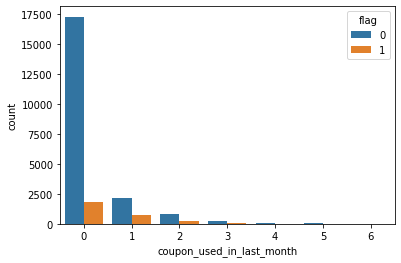

In [339]:
#可视化呈现不同自变量与优惠券使用的关系
sns.countplot(x = 'coupon_used_in_last_month', hue = 'flag', data = ping)

结论：上个月使用优惠券在4张以下的用户有可能在本次使用优惠券。

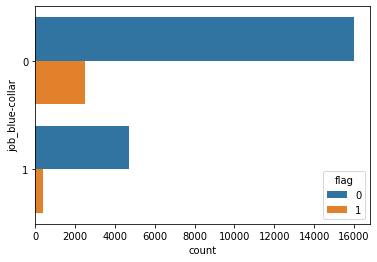

In [340]:
#结论：蓝领人士在本次使用优惠券的概率更低
sns.countplot(y = 'job_blue-collar', hue = 'flag', data = ping)

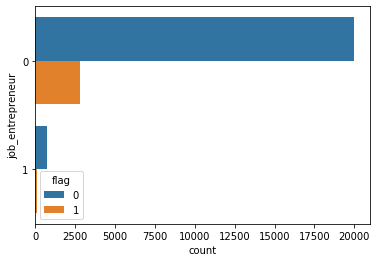

In [341]:
#结论：企业家在本次使用优惠券的概率更低
sns.countplot(y = 'job_entrepreneur', hue = 'flag', data = ping)

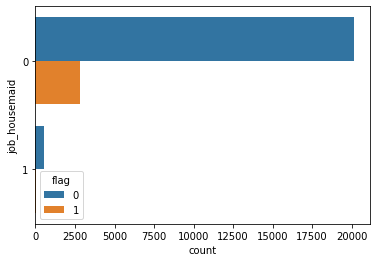

In [342]:
#保姆在本次使用优惠券的概率更低
sns.countplot(y = 'job_housemaid', hue = 'flag', data = ping)

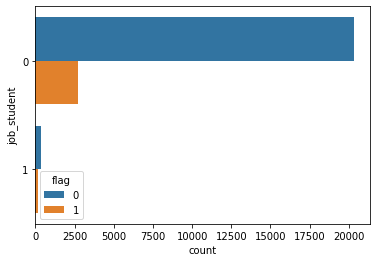

In [343]:
sns.countplot(y = 'job_student', hue = 'flag', data = ping)

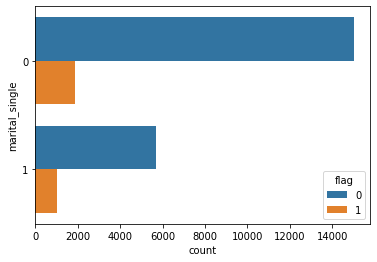

In [344]:
sns.countplot(y = 'marital_single', hue = 'flag', data = ping)

图中呈现的结论与前面平均值的结论不一致，猜测可能由于本次总体使用优惠券的用户比例在11%左右，所以根据flag分组后各特征的均值比例与实际图中有偏差，尤其是平均值比较接近的特征。

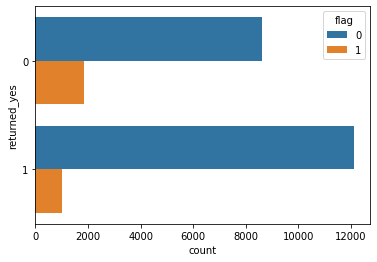

In [345]:
#有过退货的用户在本次使用优惠券的概率更低
sns.countplot(y = 'returned_yes', hue = 'flag', data = ping)

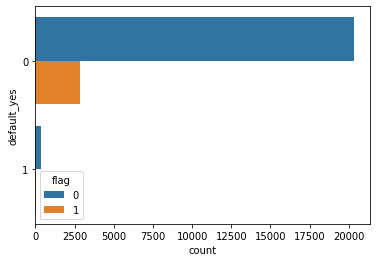

In [346]:
#信用卡有过违约的用户在本次使用优惠券的概率更低
sns.countplot(y = 'default_yes', hue = 'flag', data = ping)

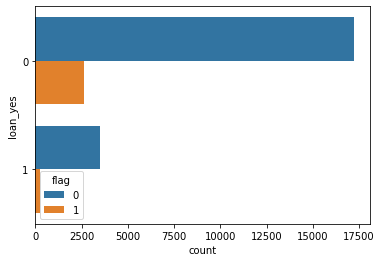

In [347]:
#使用信用卡付款的用户在本次使用优惠券的概率更低
sns.countplot(y = 'loan_yes', hue = 'flag', data = ping)

# 3相关性与可视化 

In [348]:
#围绕flag变量，分析其他变量与flag的相关关系
ping.corr()[['flag']].sort_values('flag', ascending = False)

,flag
flag,1.000000
ID,0.564569
coupon_used_in_last_month,0.127435
job_retired,0.084302
job_student,0.070929
marital_single,0.058049
job_management,0.036339
age,0.033856
job_unemployed,0.024686
job_unknown,0.003702


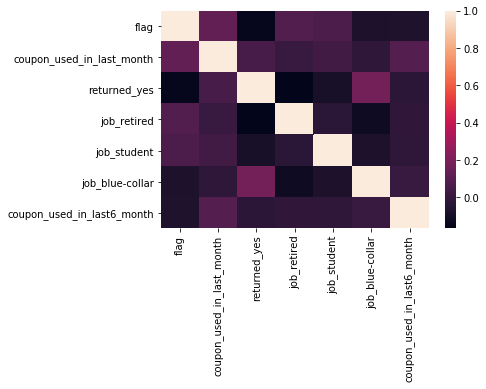

In [349]:
q1 = ['flag', 'coupon_used_in_last_month','returned_yes', 'job_retired','job_student'
     , 'job_blue-collar','coupon_used_in_last6_month']
sns.heatmap(ping[q1].corr())

结论： 上个月使用优惠券的数量、是否有过退货与本次是否使用优惠券的相关性相对更强，前六个月使用优惠券的数量、职业为学生、退休人士、蓝领人士也与本次是否使用优惠券有弱相关性。

# 4逻辑回归模型 

In [374]:
y = ping['flag']
x = ping[['coupon_used_in_last_month','returned_yes', 'job_retired','job_student'
     , 'job_blue-collar','coupon_used_in_last6_month']]

In [375]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size = 0.3,
                                                   random_state = 123)

In [376]:
from sklearn import linear_model
lr = linear_model.LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [381]:
lr.intercept_

array([-1.23134089])

In [382]:
lr.coef_

array([[ 0.52385129, -0.84692846,  0.47761079,  0.61433839, -0.40501053,
        -0.26645543]])

In [383]:
 #基于模型的结果，对训练集与测试集生成预测结果
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [384]:
import sklearn.metrics as metrics #计算评估模型的指标

In [385]:
metrics.confusion_matrix(y_train, y_pred_train)

array([[14513,    15],
       [ 1985,     7]], dtype=int64)

In [386]:
metrics.accuracy_score(y_train, y_pred_train)

0.8789346246973365

In [387]:
metrics.accuracy_score(y_test, y_pred_test)

0.8760062138116085

In [361]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[10366,     6],
       [ 1424,     5]], dtype=int64)

模型1：
使用自变量['coupon_used_in_last_month','returned_yes', 'job_retired','job_student'
     , 'job_blue-collar','coupon_used_in_last6_month']，测试集样本为30%
     
截距：-1.23134089

对应的系数：[ 0.52385129, -0.84692846,  0.47761079,  0.61433839, -0.40501053,
        -0.26645543]
     
结果：训练集的准确率：0.8789346246973365； 测试集准确率：
0.8760062138116085



——————————————————————————————————————————————————————————————
模型2：使用与模型1相同的自变量，将测试集样本改为50%

截距：-1.21541326

对应系数：[ 0.52449728, -0.8396524 ,  0.3894978 ,  0.59966004, -0.4006536 ,
        -0.26594991]

结果：训练集的准确率：0.8769491525423729；测试集准确率：0.8788238284891111



模型优化
#给age分箱

In [388]:
bins = [0, 18, 36, 60, 95]
labels = ['0-17', '18-35', '36-60','>60']
ping['age_new'] = pd.cut(ping.age, bins, right = False, labels = labels)

In [390]:
ping.groupby(['age_new'])['flag'].describe()

,count,mean,std,min,25%,50%,75%,max
age_new,,,,,,,,
0-17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18-35,8831.0,0.134073,0.340750,0.0,0.0,0.0,0.0,1.0
36-60,13799.0,0.098051,0.297394,0.0,0.0,0.0,0.0,1.0
>60,970.0,0.344330,0.475394,0.0,0.0,0.0,1.0,1.0


In [393]:
ping = pd.get_dummies(ping)

In [395]:
ping.head()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,flag,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_divorced,marital_married,marital_single,default_yes,returned_yes,loan_yes,age_new_0-17,age_new_18-35,age_new_36-60,age_new_>60
0,1,43,2,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,2,42,1,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,3,47,2,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
3,4,28,2,0,0,0,0,0,0,1,...,0,0,1,0,1,1,0,1,0,0
4,5,42,5,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


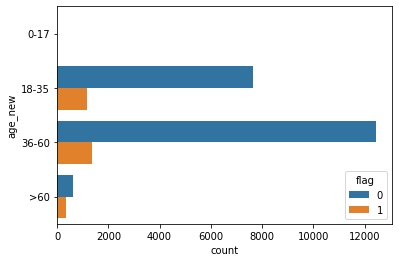

In [391]:
sns.countplot(y = 'age_new', hue = 'flag', data = ping)

结论：36-60岁的用户更有可能使用优惠券

In [398]:
ping.drop(['age_new_0-17'], axis = 1, inplace = True)

In [399]:
ping.corr()[['flag']].sort_values('flag', ascending = False)

,flag
flag,1.000000
ID,0.564569
age_new_>60,0.141037
coupon_used_in_last_month,0.127435
job_retired,0.084302
job_student,0.070929
marital_single,0.058049
job_management,0.036339
age,0.033856
age_new_18-35,0.029394


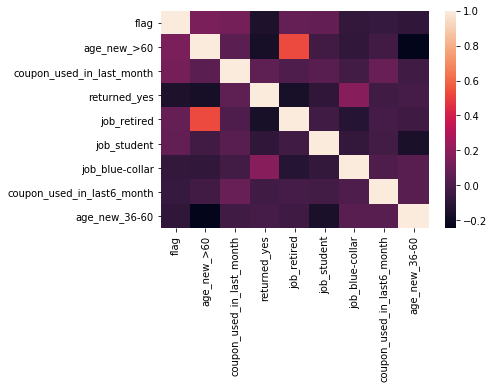

In [413]:
q2 = ['flag', 'age_new_>60','coupon_used_in_last_month','returned_yes', 'job_retired','job_student'
     , 'job_blue-collar','coupon_used_in_last6_month','age_new_36-60']
sns.heatmap(ping[q2].corr())

In [414]:
y = ping['flag']
x = ping[['age_new_>60','coupon_used_in_last_month','returned_yes', 'job_retired','job_student'
     , 'job_blue-collar','coupon_used_in_last6_month','age_new_36-60']]

In [415]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size = 0.5,
                                                   random_state = 123)

In [416]:
from sklearn import linear_model
lr = linear_model.LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [417]:
lr.intercept_

array([-1.11921334])

In [418]:
lr.coef_

array([[ 0.96727005,  0.50807625, -0.7977134 , -0.22940985,  0.49960528,
        -0.38487718, -0.25511226, -0.27624979]])

In [419]:
 #基于模型的结果，对训练集与测试集生成预测结果
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [420]:
import sklearn.metrics as metrics #计算评估模型的指标

In [421]:
metrics.confusion_matrix(y_train, y_pred_train)

array([[10318,    40],
       [ 1415,    27]], dtype=int64)

In [422]:
metrics.accuracy_score(y_train, y_pred_train)

0.8766949152542373

In [423]:
metrics.accuracy_score(y_test, y_pred_test)

0.8779764426743496

In [424]:
metrics.confusion_matrix(y_test, y_pred_test)

array([[10333,    39],
       [ 1401,    28]], dtype=int64)

模型3：在模型1的基础上增加分箱后变成哑变量的age_new_>60，age_new_36-60，将测试集样本改为50%

截距：-1.11921334

对应系数：[0.96727005,  0.50807625, -0.7977134 , -0.22940985,  0.49960528,
        -0.38487718, -0.25511226, -0.27624979]

结果：训练集的准确率：0.8766949152542373；测试集准确率：0.8779764426743496

模型3的训练集准确率与模型2相似，但测试集准确率低于模型2，目前模型2的结果最优。

模型2：使用与模型1相同的自变量，将测试集样本改为50%
['coupon_used_in_last_month','returned_yes', 'job_retired','job_student'
     , 'job_blue-collar','coupon_used_in_last6_month']
截距：-1.21541326

对应系数：[ 0.52449728, -0.8396524 ,  0.3894978 ,  0.59966004, -0.4006536 ,
        -0.26594991]

结果：训练集的准确率：0.8769491525423729；测试集准确率：0.8788238284891111

这里使用模型2的系数进行业务解读：
1. coupon_used_in_last_month：exp(0.52449728)=1.689609.上个月使用优惠券数量多的比没使用的用户在本次使用优惠券的概率高1.69倍。上个月多使用1张优惠券，本次使用优惠券的概率提升69%。
2. returned_yes：exp( -0.8396524) = 0.431861. 有过退货的用户使用本次优惠券的概率是没有过退货记录的用户低57%
3. job_retired：exp(0.3894978) = 1.476239。退休人士使用本优惠券的概率是非退休人士的1.48倍
4. job_student：exp(0.59966004) = 1.821499。学生使用本优惠券的概率是其他人士的1.82倍
5. job_blue-collar：exp(-0.4006536) = 0.669882。蓝领人士使用本次优惠券的概率比其他人士低33%。
6. coupon_used_in_last6_month: exp(-0.26594991) = 0.766478。前六个月使用优惠券越多的用户在本次使用优惠券的概率越低。前六个月多使用1张优惠券，本次使用的概率减少23%。


结论和建议：
1. 因此要让本次优惠券的使用率提高，拼多多可以针对学生、退休人士群体加大优惠券的宣传力度和优惠力度，例如在app开屏，首页banner，各商品浏览页面提醒，付款页面提醒等等增加优惠券的展示和减免的优惠金额。
2. 深入探索蓝领人士使用优惠券意愿低的原因。是优惠玩法不够简单易懂？是优惠力度的问题？还是没有满足他们对特定商品需求的优惠？
3. 完善拼多多的商家退货和商家商品在真实性、质量、描述方面的管理，增加用户对商家的信任度，从而促进用户放心购买优惠产品。

疑问：
1. age, coupon_used_in_last_month, coupon_used_in_last6_month这三个变量都有离群值（？我的理解对吗），我只对coupon_used_in_last_month进行了离群值删除，那么其他几个变量是否这样做对预测结果更好呢?
2. 对age分箱后，36-60岁的人群使用优惠券的人更多，但在相关性中与flag呈现负相关关系，反而60岁以上的人群使用的更少，而与flag呈正相关关系，这里怎么解释呢？还是这是正常的现象？
3. 在模型3中的相关性热力图里，age_new_>60与job_retired的相关性强，这里会不会产生了共线性导致了模型3的准确率没有模型2高？